In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings 
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Data Cleaning and Visualization

In [57]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [58]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [59]:
df['phd'] =df['yrs.since.phd']
df['service'] =df['yrs.service']
df= df.drop(['yrs.since.phd', 'yrs.service'],axis=1)

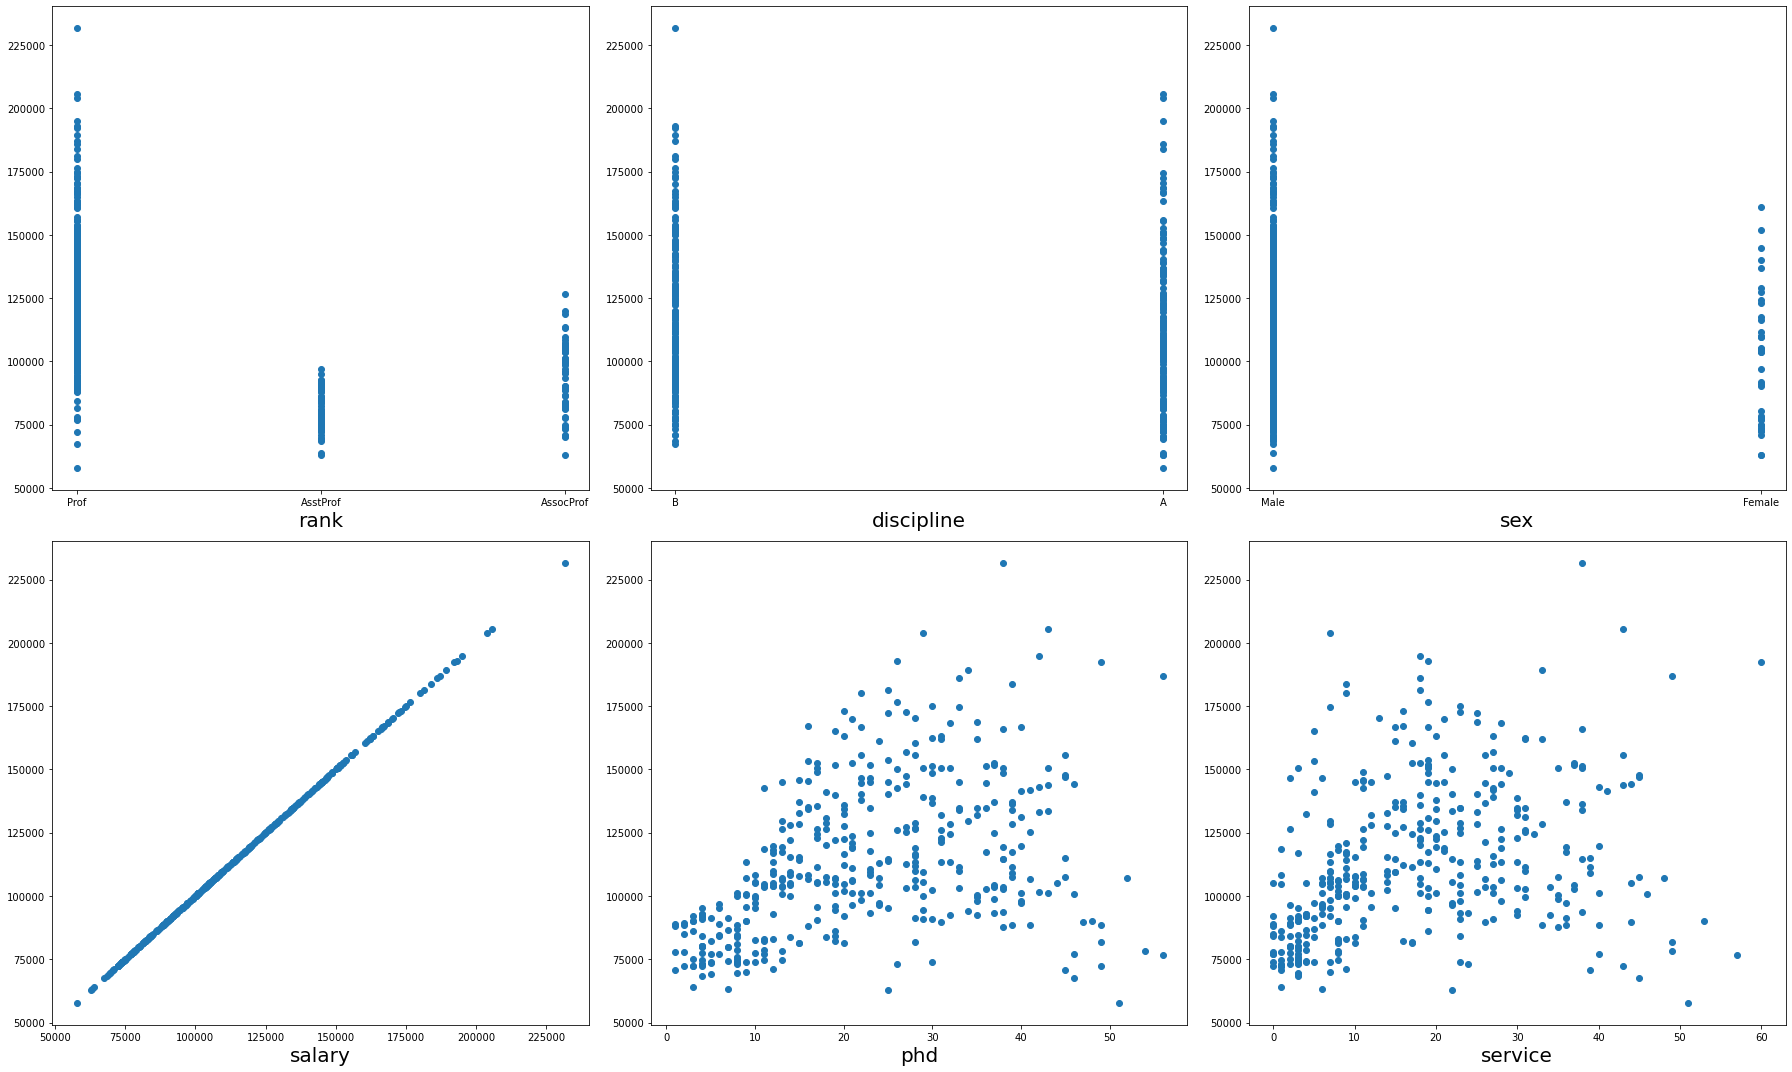

In [60]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in df:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        plt.scatter(df[column],df['salary'])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [61]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [62]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [63]:
df.describe()

,rank,discipline,sex,salary,phd,service
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,0.901763,113706.458438,22.314861,17.614610
std,0.757486,0.498682,0.298010,30289.038695,12.887003,13.006024
min,0.000000,0.000000,0.000000,57800.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,91000.000000,12.000000,7.000000
50%,2.000000,1.000000,1.000000,107300.000000,21.000000,16.000000
75%,2.000000,1.000000,1.000000,134185.000000,32.000000,27.000000
max,2.000000,1.000000,1.000000,231545.000000,56.000000,60.000000


In [64]:
df.corr()

,rank,discipline,sex,salary,phd,service
rank,1.000000,-0.086266,0.132492,0.522207,0.525500,0.447499
discipline,-0.086266,1.000000,0.003724,0.156084,-0.218087,-0.164599
sex,0.132492,0.003724,1.000000,0.138610,0.148788,0.153740
salary,0.522207,0.156084,0.138610,1.000000,0.419231,0.334745
phd,0.525500,-0.218087,0.148788,0.419231,1.000000,0.909649
service,0.447499,-0.164599,0.153740,0.334745,0.909649,1.000000


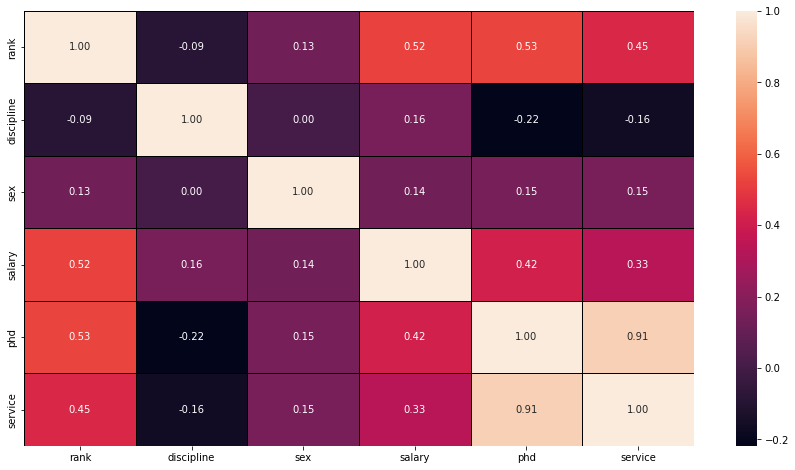

In [65]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

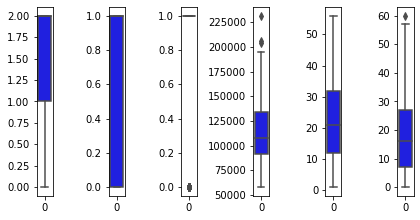

In [66]:
a = df.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = df[a[i]],color='blue',orient='v')
    plt.tight_layout()

In [67]:
df.skew()

rank         -1.151164
discipline   -0.177684
sex          -2.709958
salary        0.714568
phd           0.300880
service       0.650569
dtype: float64

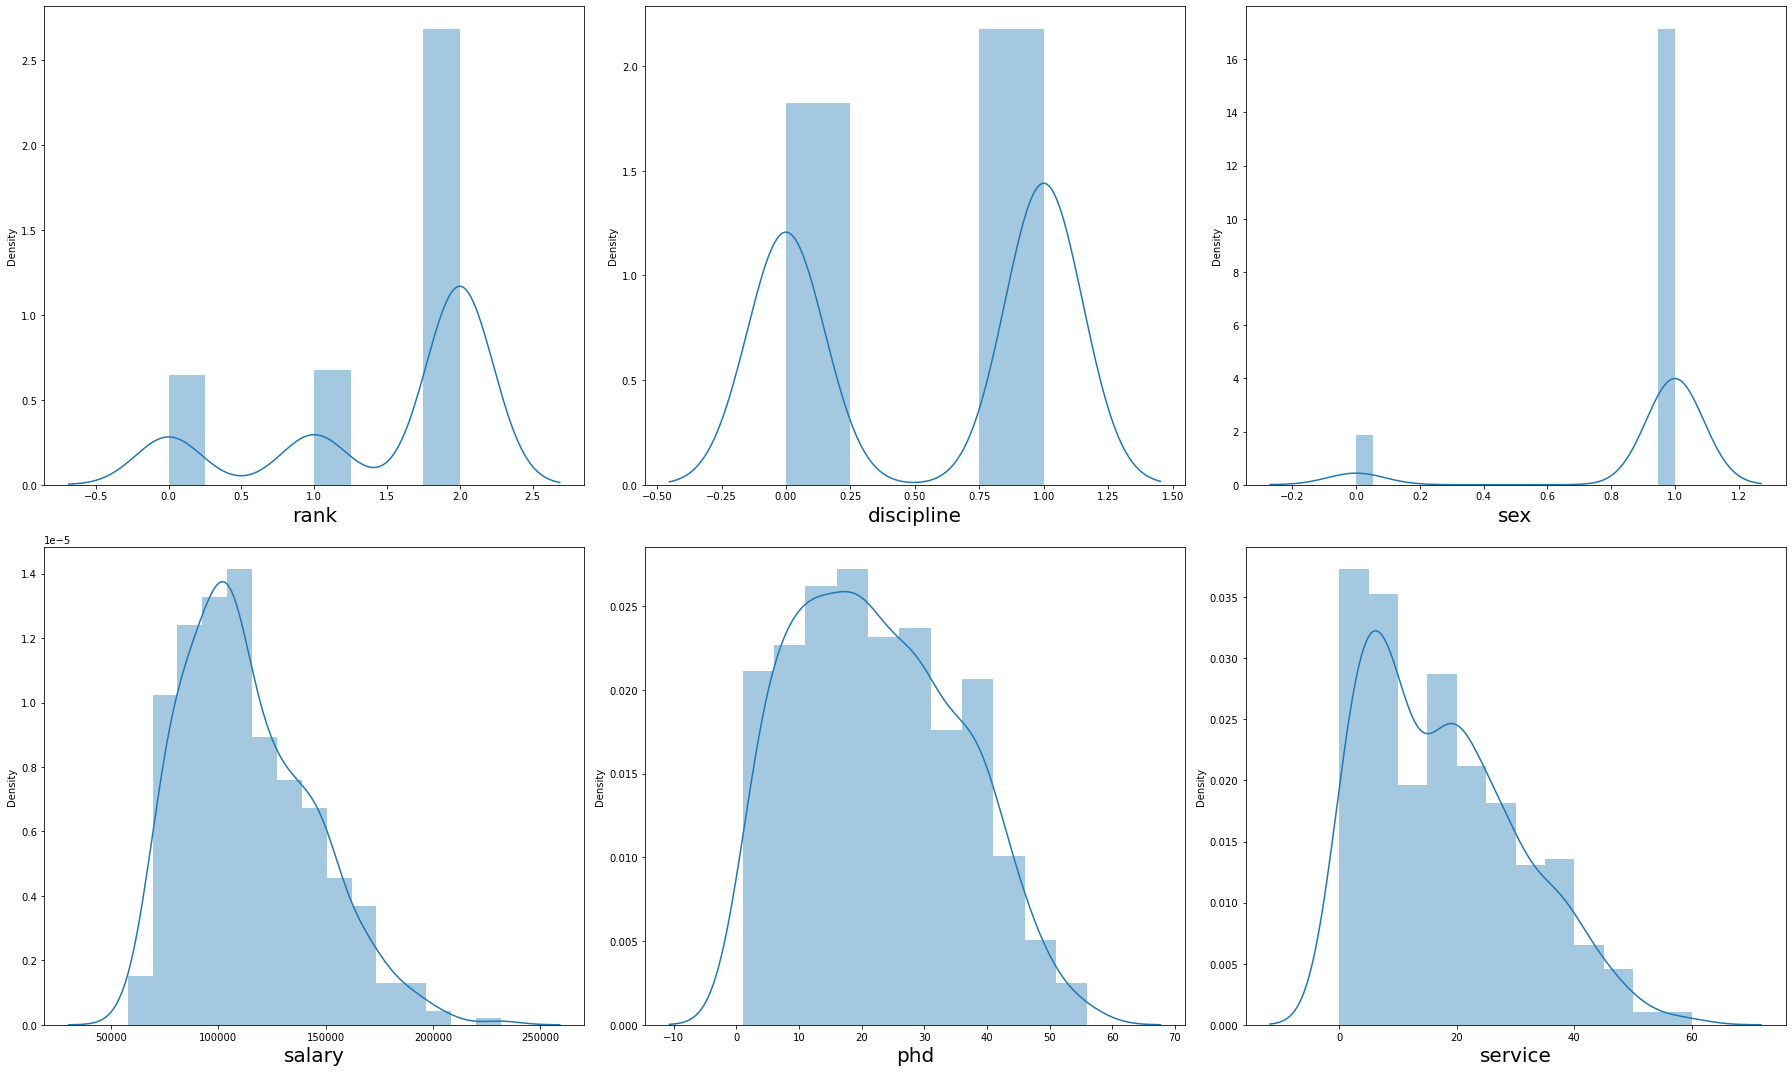

In [68]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in df:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [69]:
df=df.drop('sex',axis=1)

In [70]:
df1 = df[['phd','service']]

In [71]:
df1

,phd,service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
df1 = df1[(z<3).all(axis=1)]
df1

,phd,service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [73]:
df[['phd','service']]=df1[['phd','service']]

In [74]:
df.isnull().sum()

rank          0
discipline    0
salary        0
phd           2
service       2
dtype: int64

In [75]:
df=df.dropna()

In [76]:
df.isnull().sum()

rank          0
discipline    0
salary        0
phd           0
service       0
dtype: int64

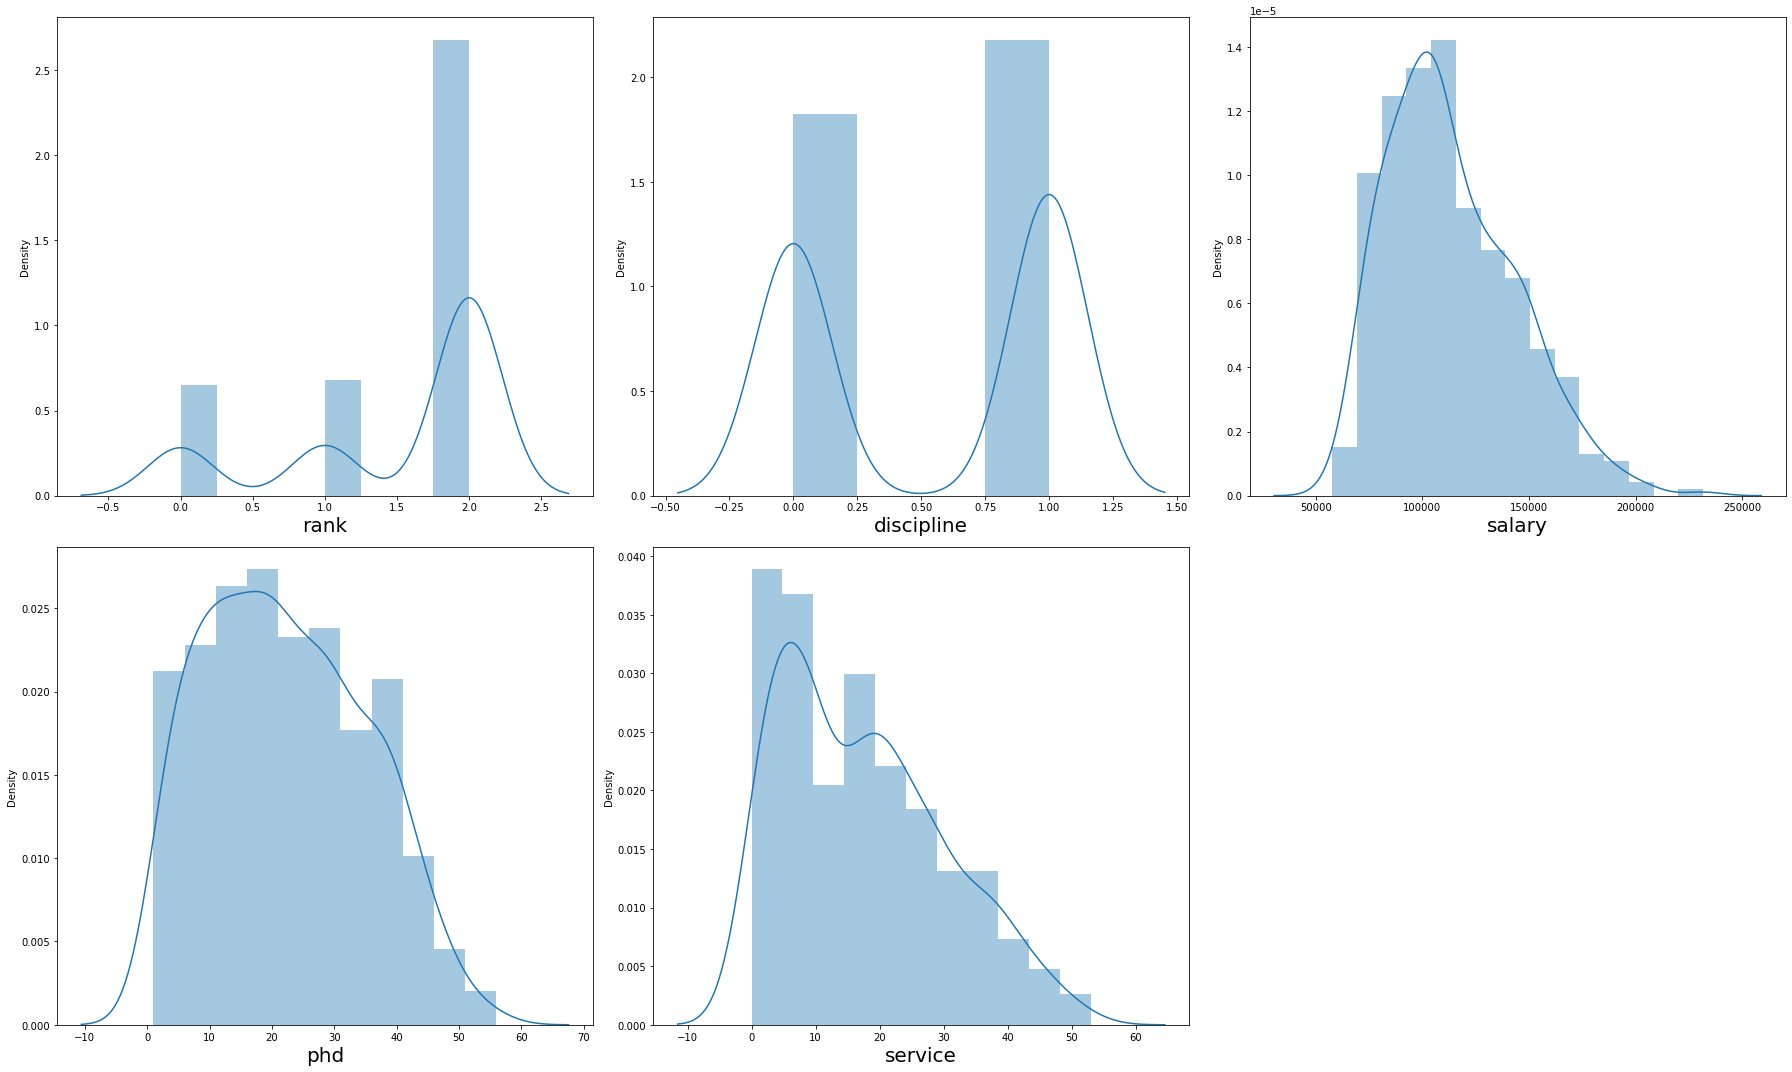

In [77]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in df:
    if plotno <= 6:
        ax = plt.subplot(2,3,plotno)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [78]:
df.skew()

rank         -1.143468
discipline   -0.178594
salary        0.705277
phd           0.278819
service       0.579600
dtype: float64

# Model Building

In [79]:
df

,rank,discipline,salary,phd,service
0,2.0,1.0,139750,19.0,18.0
1,2.0,1.0,173200,20.0,16.0
2,1.0,1.0,79750,4.0,3.0
3,2.0,1.0,115000,45.0,39.0
4,2.0,1.0,141500,40.0,41.0
...,...,...,...,...,...
392,2.0,0.0,103106,33.0,30.0
393,2.0,0.0,150564,31.0,19.0
394,2.0,0.0,101738,42.0,25.0
395,2.0,0.0,95329,25.0,15.0


In [26]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

from sklearn.metrics import r2_score

In [103]:
df

,rank,discipline,salary,phd,service
0,2.0,1.0,139750,19.0,18.0
1,2.0,1.0,173200,20.0,16.0
2,1.0,1.0,79750,4.0,3.0
3,2.0,1.0,115000,45.0,39.0
4,2.0,1.0,141500,40.0,41.0
...,...,...,...,...,...
392,2.0,0.0,103106,33.0,30.0
393,2.0,0.0,150564,31.0,19.0
394,2.0,0.0,101738,42.0,25.0
395,2.0,0.0,95329,25.0,15.0


In [104]:
x = df.drop('salary',axis=1)
y = df['salary']

In [81]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)
reg= LinearRegression()


In [30]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.20,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')


# initialized the train_test_split

At Random state 0 the training accuracy is :- 0.37578948845743254
At Random state 0 the testing accuracy is :- 0.36193471363868723


At Random state 1 the training accuracy is :- 0.39619468913436795
At Random state 1 the testing accuracy is :- 0.28346585653301315


At Random state 2 the training accuracy is :- 0.36922890059229485
At Random state 2 the testing accuracy is :- 0.37537309298387


At Random state 3 the training accuracy is :- 0.38015366780162263
At Random state 3 the testing accuracy is :- 0.3402919791406407


At Random state 4 the training accuracy is :- 0.3497702845753047
At Random state 4 the testing accuracy is :- 0.43511847047391217


At Random state 5 the training accuracy is :- 0.3736785117867497
At Random state 5 the testing accuracy is :- 0.3725207706030431


At Random state 6 the training accuracy is :- 0.3821257202898749
At Random state 6 the testing accuracy is :- 0.31839018783731576


At Random state 7 the training accuracy is :- 0.3844611106847927
At Random st

In [106]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 41)

In [32]:
reg.score(x_train, y_train)

0.37142733533034533

In [33]:
reg.score(x_test, y_test)

0.3772711543723605

In [34]:
y_pred = reg.predict(x_test)

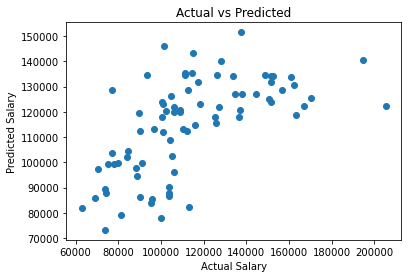

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted')
plt.show()

In [36]:
mean_squared_error (y_test,y_pred)

555632234.5760424

In [37]:
mean_absolute_error(y_test,y_pred)

19076.16866938338

In [38]:
r2_score (y_test,y_pred)

0.3772711543723605

# Regularization

In [39]:
Lassocv = LassoCV(alphas = None, max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.37052957010420806

In [40]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
rdgcv.fit(x_train, y_train)
rd_model = Ridge(alpha=rdgcv.alpha_)
rd_model.fit(x_train, y_train)
rd_model.score(x_test, y_test)

0.37053355279011446

# Conclusion

- Train data accurancy score is 37.14%
- Test data accurancy score is 37.72%
- Lasso model accurancy score is 37.05%
- Ridge model accurancy score is 37.05%

- Hence the Linear Regression model is not overfitted

# Findings


- The data is so less to build a model.
- The accuracy score is too less to use the model to predict any findings
- This model should not be use to predict any data

In [109]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [111]:
y_pred= knn.predict(x_test)  

In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

       62884       0.00      0.00      0.00         1
       63100       0.00      0.00      0.00         0
       67559       0.00      0.00      0.00         0
       69200       0.00      0.00      0.00         1
       70000       0.00      0.00      0.00         0
       70700       0.00      0.00      0.00         0
       70768       0.00      0.00      0.00         1
       71065       0.00      0.00      0.00         0
       72300       0.00      0.00      0.00         0
       72500       0.00      0.00      0.00         0
       73266       0.00      0.00      0.00         0
       73300       0.00      0.00      0.00         0
       73877       0.00      0.00      0.00         1
       74000       0.00      0.00      0.00         1
       74500       0.00      0.00      0.00         1
       75243       0.00      0.00      0.00         1
       77000       0.00      0.00      0.00         1
       77202       0.00    

In [102]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)